
# Project: Investigation of medical appointment No-Shows in Brazil. 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

> In this project we investigate the "Medical Appointment No Shows" dataset provided by JoniHoppen on Kaggle.

> We will try to answer the question why patients miss their scheduled medical appointments and find out which factors play the biggest role. Is missing scheduled medical appointments related to gender, age or various handicaps? Is it related to whether the patient received a reminder notification via SMS or not? Has the time between the moment the patient schedules their appointment and the actual appointment date anything to do with the probability of the patient showing up to their appointment? Does a specific condition like Alcoholism, Hypertension, Diabetes affects it? We will examine all the above questions separately and, in some cases, collectively.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

>Firstly we import all the necessary packages for our analysis

<a id='wrangling'></a>
# Data Wrangling

### General Properties

In [2]:
df = pd.read_csv(r'C:\Users\afled\Desktop\KaggleV2-May-2016.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
df.shape

(110527, 14)

In [5]:
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [6]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
df_AgeMinus = df[df.Age < 0]
df_AgeMinus

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [8]:
df['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

>We load the **KaggleV2-May-2016.csv** file with our dataset and check its general properties with df.info. Afterwards we check its shape with df.shape and we print the first three rows with df.head to have a first look of how the dataset actually looks. Lastly we use df.describe to generate statistical measures. 


# Data Cleaning

>After the initial check of the dataset, we found out that it consists of 110527 rows and 14 columns, there are no null values and it seems like there are a few things we need to clean and will do in the following cells.

>We notice the following problems:

>The Age column has one row with value of -1. This is probably a minor error in he dataset so we will remove it.

>We also see that the Handicap column has values from 0 o 4, without any further information on what they represent. By checking the value counts of it we would assume that it probably means the number of handicaps for each patient. It looks like it makes sense to categorize it to patients with or without handicaps because the value counts for 2,3 and 4 respectively are too low. We will do that however later in the exploratory data analysis. The column's name will be changed from Handcap to Handicap as well, to fix this minor, probably typographic, error. 

>The No-Show column will need to be fixed as well. Yes and No will be replaced by the numerical values 1 and 2. It will also be renamed to No_show.

>Another thing that needs to be changed is the datatypes of the columns ScheduledDay and AppointmentDay. As we will to try answer the question if if the time between the schedule date and the appointment date plays a role on whether the patient actually shows we will need to convert them to datetime so we can deduct one from another. After doing so, we will create a new column where we  will store the result and we will be convert it to a timedelta with a day precision.

>Lastly the columns PatientId and AppointmentID will be dropped, along with the ScheduledDay and AppointmentDay ones, as there is no further use for them in this analysis.

>Other than that, the other columns' datatypes do not need any changes.

In [9]:
df = df[df.Age >= 0]

Removing the row with Age of -1.

In [10]:
df.rename(columns={'Handcap':'Handicap'}, inplace=True)
df.rename(columns={'No-show':'No_show'}, inplace=True)
df['No_show'] = pd.Series(np.where(df.No_show.values == "Yes", 1, 0), df.index)

Renaming Handcap and No-show columns, as well as replacing the values of No-show column with 0s and 1s.

In [11]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['AwaitingTime'] = df["AppointmentDay"].sub(df["ScheduledDay"], axis=0)
df["AwaitingTime"] = (df["AwaitingTime"] / np.timedelta64(1, 'D')).abs()
df["AwaitingTime"] = round(df["AwaitingTime"],1)

 We change the datatypes of the columns ScheduledDay and AppointmentDay to datetime, we subtract ScheduledDay values from AppointmentDay values and store the results to a new column AwaitingTime, which we will use for our analysis, and then we convert it to timedelta with a day precision and round it to one decimal.

In [12]:
df.drop(["PatientId",'AppointmentID','ScheduledDay','AppointmentDay'], axis=1, inplace = True)

We use df.drop to drop the unnecessary columns.

<a id='eda'></a>
# Exploratory Data Analysis

### Does Age, Gender or having a Scholarship Bolsa Família is a social welfare program of the Government of Brazil) play a role in the probability of a patient not showing up at their scheduled medical appointment?

In [13]:
df.head(1)

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,AwaitingTime
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0.8


### 1. Gender

In [14]:
df.groupby('Gender').No_show.mean()

Gender
F    0.203149
M    0.199679
Name: No_show, dtype: float64

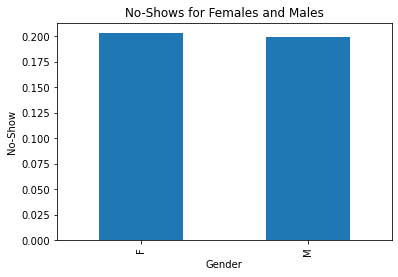

In [15]:
df.groupby('Gender').No_show.mean().plot(kind='bar')
plt.title('No-Shows for Females and Males')
plt.ylabel('No-Show');

We group our data by Gender and calculate the No-Show mean for Males and Females. The numbers is almost identically, which also shows visually in the above bar graph. 
Gender does not seem affect the probability of a patient missing a scheduled appointmnet.

### 2. Age

In [16]:
no_show = df.No_show == 1

show = df.No_show == 0

We create Masks for "Show" or "No-Show"

In [17]:
df.Age[show].mean(),df.Age[no_show].mean()

(37.790504154999034, 34.31766656212196)

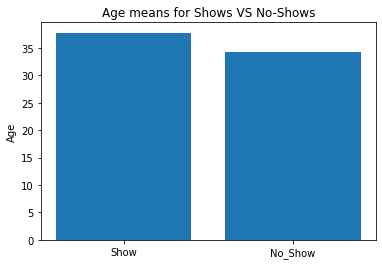

In [18]:
locations = [1, 2]
heights = [df.Age[show].mean(), df.Age[no_show].mean()]
labels = ['Show','No_Show']
plt.bar(locations, heights, tick_label=labels)
plt.title('Age means for Shows VS No-Shows')
plt.ylabel('Age');

We firstly check the Age means for "Show" or "No-Show" using the masks we created above.

There is a clear indication here that younger people tend to miss their medical appointments more frequently, as the age mean for patients that show up normally is around 37.8 whereas the age mean for patients that did not show up is around 34.3.

We also plotted a simple graph that helps visually display that tendency.

In [19]:
df['Age'].describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

We investigate the Age column further, attemting to gain more insight to the distribution of ages so that we can investigate specific age groups.

In [20]:
Age0_20 = df.query('Age > 0 & Age < 20')
Age20_40 = df.query('Age >= 20 & Age < 40')
Age40_60 = df.query('Age >= 40 & Age < 60')
Age60Plus = df.query('Age >= 60')

We filter our data in 4 age groups: 0-20, 20-40, 40-60, 60+.

In [21]:
NoShows0_20 = Age0_20.No_show.mean()
NoShows20_40 = Age20_40.No_show.mean()
NoShows40_60 = Age40_60.No_show.mean()
NoShows60Plus = Age60Plus.No_show.mean()

We take the No-Show means for each age group in order to plot it and understand if the Age plays a role in No-Shows

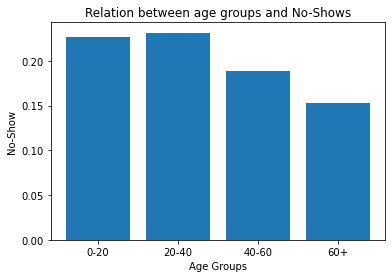

In [22]:
plt.bar(['0-20','20-40','40-60','60+'],[NoShows0_20,NoShows20_40,NoShows40_60,NoShows60Plus])
plt.title('Relation between age groups and No-Shows')
plt.xlabel('Age Groups')
plt.ylabel('No-Show');

In [23]:
NoShows0_20,NoShows20_40,NoShows40_60,NoShows60Plus

(0.22707651086632927,
 0.23138205749913404,
 0.18808193668528864,
 0.15311953903556416)

In [24]:
Age0_40 = df.query('Age < 40')
NoShows0_40 = Age0_40.No_show.mean()

NoShows0_40

0.22639631585162193

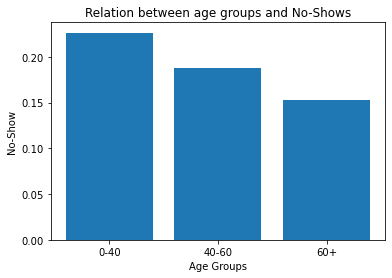

In [25]:
plt.bar(['0-40','40-60','60+'],[NoShows0_40,NoShows40_60,NoShows60Plus])
plt.title('Relation between age groups and No-Shows')
plt.xlabel('Age Groups')
plt.ylabel('No-Show');

We can also see here that younger patients from 0-40 miss their medical appointments more often. More specifically patients in the age group 20-40 have the highest No-Show mean.

### 3. Scholarship

In [26]:
df.groupby('Scholarship').No_show.mean()

Scholarship
0    0.198074
1    0.237363
Name: No_show, dtype: float64

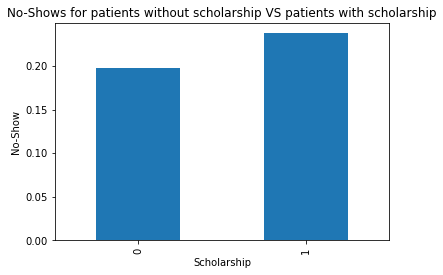

In [27]:
df.groupby('Scholarship').No_show.mean().plot(kind='bar')
plt.title('No-Shows for patients without scholarship VS patients with scholarship')
plt.ylabel('No-Show');

We group our data by Scholarship and calculate the No-Show mean for patients with or without scholarship. 
It seems like patients with a scholarship tend to miss their medical appointments more often. We can see that in the bar graph above as well.
Perhaps the reason why this happens is that the fees are covered by the social welfare and they may value the service less than the patients who are not covered and have to pay a fee for the sevice.


### Do factors like:
### •	having a condition like Hipertension or Diabetes, or
### •	being Alcoholic or Handicaped 
###    play a role in the probability of a patient not showing up at their scheduled medical appointment?











### 1. Hipertension

In [28]:
df.groupby('Hipertension').No_show.mean()

Hipertension
0    0.209039
1    0.173020
Name: No_show, dtype: float64

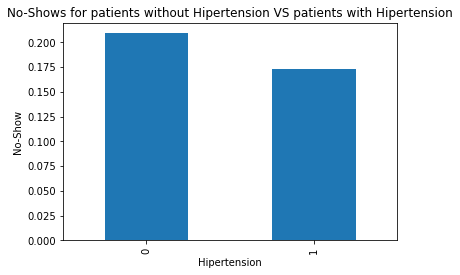

In [29]:
df.groupby('Hipertension').No_show.mean().plot(kind='bar')
plt.title('No-Shows for patients without Hipertension VS patients with Hipertension')
plt.ylabel('No-Show');

We group our data by Hipertension and calculate the No-Show mean for patients with or without Hipertension. 
It seems like patients with Hipertension tend to attend their medical appointments more often than he rest of the sample. We can see that in the bar graph above as well.
We can assume that because of their condition their appointments are more crucial than those of the rest of the sample.

### 2. Diabetes

In [30]:
df.groupby('Diabetes').No_show.mean()

Diabetes
0    0.203630
1    0.180033
Name: No_show, dtype: float64

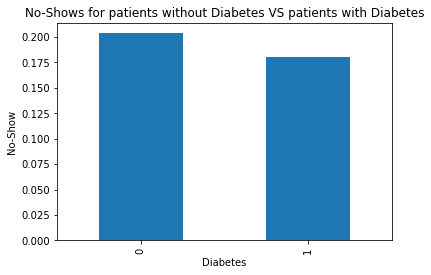

In [31]:
df.groupby('Diabetes').No_show.mean().plot(kind='bar')
plt.title('No-Shows for patients without Diabetes VS patients with Diabetes')
plt.ylabel('No-Show');

We group our data by Diabetes and calculate the No-Show mean for patients with or without Diabetes. 
It seems like patients with Diabetes tend to attend their medical appointments more often than he rest of the sample. We can see that in the bar graph above as well.
We can assume that because of their condition their appointments are more crucial than those of the rest of the sample.

### 3. Alcoholism

In [32]:
df.groupby('Alcoholism').No_show.mean()

Alcoholism
0    0.201948
1    0.201488
Name: No_show, dtype: float64

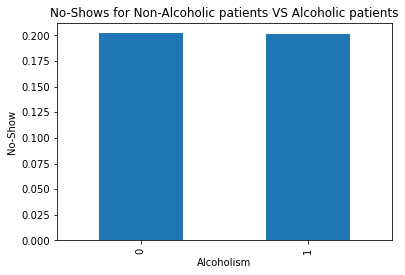

In [33]:
df.groupby('Alcoholism').No_show.mean().plot(kind='bar')
plt.title('No-Shows for Non-Alcoholic patients VS Alcoholic patients')
plt.ylabel('No-Show');

We group our data by Alcoholism and calculate the No-Show mean for Alcoholic patients and Non-Alcoholic patients. 
Here we can see both from the means and the bar graph that the numbers are virtually identical, which shows that whether a patient is alcoholic or not does not affect their chances to miss or attend a medical appointment

### 4. Handicap

In [34]:
No_Handicap = df.query('Handicap == 0')
Handicap = df.query('Handicap > 0')

In [35]:
No_Handicap_Mean = No_Handicap['No_show'].mean()
Handicap_Mean = Handicap['No_show'].mean()

In [36]:
No_Handicap_Mean,Handicap_Mean

(0.20235489680011082, 0.18161535029004908)

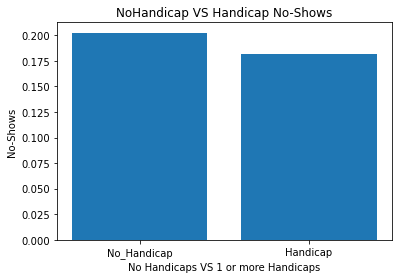

In [37]:
locations = [1, 2]
heights = [No_Handicap_Mean, Handicap_Mean]
labels = ['No_Handicap', 'Handicap']
plt.bar(locations, heights, tick_label=labels)
plt.title('NoHandicap VS Handicap No-Shows')
plt.xlabel('No Handicaps VS 1 or more Handicaps')
plt.ylabel('No-Shows');

As mentioned earlier, Handicap 2,3 and 4 is a very small percentage of our sample so here we use query to create two categories. Patients without Handicaps and patients with Handicaps, regardless of the number.
Following, we examine the No-Show means for the two categories both numerically and visually and what we can observe is that patients with Handicaps seem to miss medical appointments less frequently than the patients with no Handicaps. 

### Does the Neighbourhood where the appointment takes place, the time that the patients have to wait from the moment they schedule their appointments until the date of the appointment, or whether they received an SMS reminder notification plays a role in the probability of a patient not showing up at their scheduled medical appointment?

### 1. Neighbourhood

In [38]:
NeighbourhoodStats = df.groupby('Neighbourhood')['No_show'].agg(['mean', 'count'])

In [39]:
NeighbourhoodStats.sort_values(by='mean',ascending=False).head(60)

,mean,count
Neighbourhood,,
ILHAS OCEÂNICAS DE TRINDADE,1.000000,2
SANTOS DUMONT,0.289185,1276
SANTA CECÍLIA,0.274554,448
SANTA CLARA,0.264822,506
ITARARÉ,0.262664,3514
JESUS DE NAZARETH,0.243954,2853
HORTO,0.240000,175
ILHA DO PRÍNCIPE,0.234775,2266
CARATOÍRA,0.230409,2565


Here we group the Neighbourhoods where the appointments take place by the No-Shows, we use the aggregate operation for the mean and the count and we sort the results by the highest No-Show mean. This way we have a better understanding of where patients more frequently miss their appointments. This might be an indication of a dangerous neighbourhood or a hospital in the neighbourhood with bad reputation that patients tend to avoid.

In [40]:
NeighbourhoodStats.describe()

,mean,count
count,81.000000,81.000000
mean,0.205428,1364.518519
std,0.097230,1369.191779
min,0.000000,1.000000
25%,0.179907,413.000000
50%,0.197588,851.000000
75%,0.217454,2018.000000
max,1.000000,7717.000000


In [41]:
NeighbourhoodStats.query('count == 7717')

,mean,count
Neighbourhood,,
JARDIM CAMBURI,0.189841,7717


We use investigate the Neighbourhood column a little further to find out the mean values of the No-Shows means and counts as well as the max count as an example. Jardim Camburi is the neighbourhood with the most appointments and the No-Show mean is below the overall No-Show mean.

In [42]:
MoreThanMean = NeighbourhoodStats.query('count > 1364')


MoreThanMean.sort_values(by='mean',ascending=False).head(10)

,mean,count
Neighbourhood,,
ITARARÉ,0.262664,3514
JESUS DE NAZARETH,0.243954,2853
ILHA DO PRÍNCIPE,0.234775,2266
CARATOÍRA,0.230409,2565
ANDORINHAS,0.230327,2262
GURIGICA,0.225966,2018
MARUÍPE,0.222923,1902
CRUZAMENTO,0.217454,1398
SÃO JOSÉ,0.216490,1977


Here we filter with query to find out the top 10 No-Show neighbourhoods with a number of appointments over the mean number of appointments. We could also filter per percentiles but this gives a good understanding of the busy neighbourhoods with high No-Show probability. Below there is a horizontal bar graph that shows the top 10 No-Show neighbourhoods in relation to the overall No-Show mean.

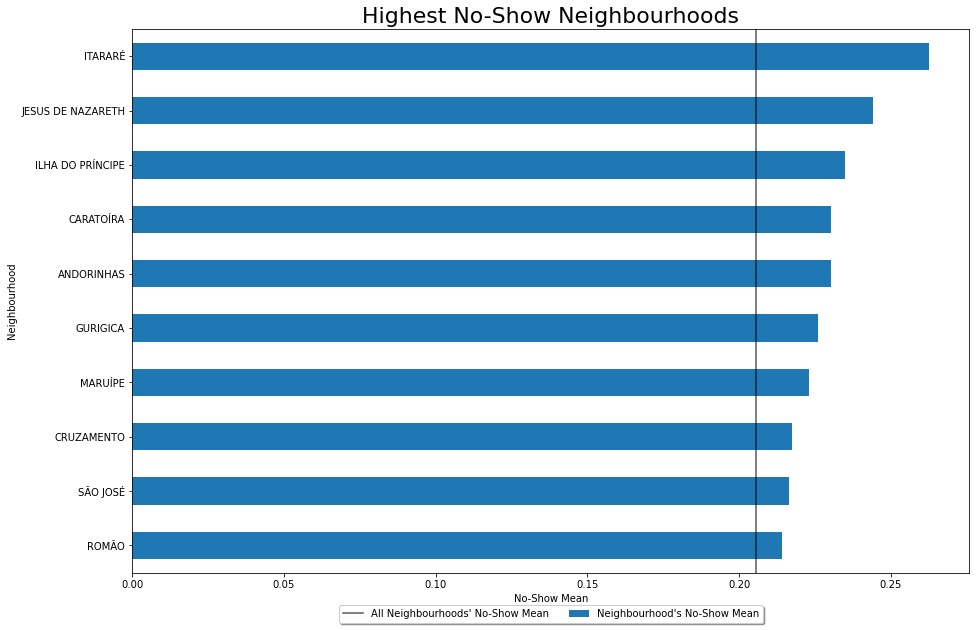

In [43]:
MoreThanMean['mean'].sort_values().tail(10).plot(kind='barh', figsize=(15, 10),label = "Neighbourhood's No-Show Mean")
plt.axvline(0.205428, label = "All Neighbourhoods' No-Show Mean", color='black', alpha=0.65)
plt.title('Highest No-Show Neighbourhoods', fontsize=22)
plt.xlabel('No-Show Mean')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=5);

In [44]:
MoreThanMean = NeighbourhoodStats.query('count > 1364')


MoreThanMean.sort_values(by='mean').head(10)

,mean,count
Neighbourhood,,
SANTA MARTHA,0.158416,3131
JARDIM DA PENHA,0.162755,3877
CONSOLAÇÃO,0.172238,1376
SANTO ANTÔNIO,0.176256,2746
REDENÇÃO,0.177077,1553
NOVA PALESTINA,0.177562,2264
JABOUR,0.179753,2509
JOANA D´ARC,0.180799,1427
TABUAZEIRO,0.182950,3132


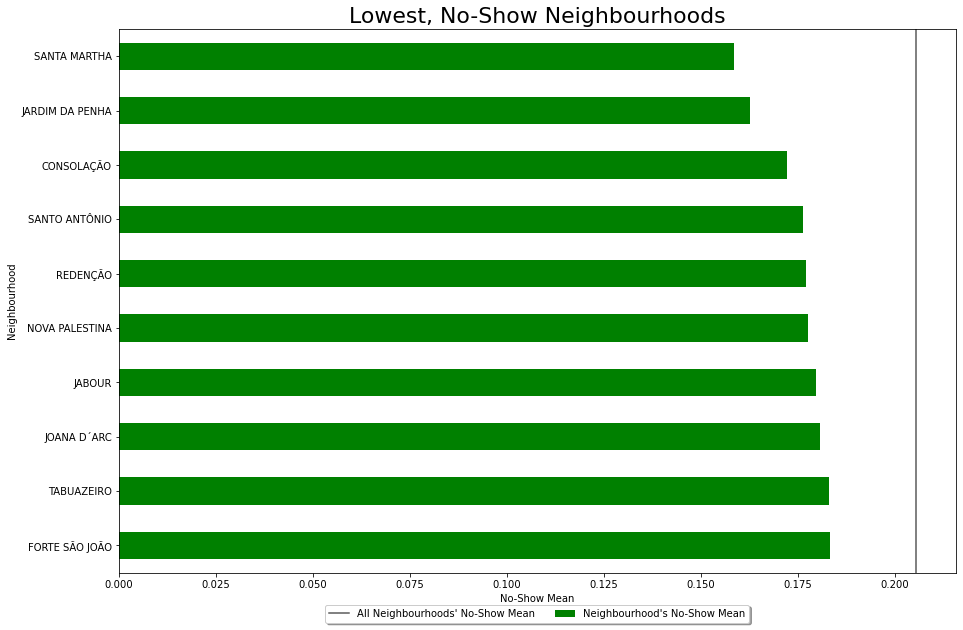

In [45]:
MoreThanMean['mean'].sort_values(ascending=False).tail(10).plot(kind='barh',color='green', figsize=(15, 10),label = "Neighbourhood's No-Show Mean")
plt.axvline(0.205428, label = "All Neighbourhoods' No-Show Mean", color='black', alpha=0.65)
plt.title('Lowest, No-Show Neighbourhoods', fontsize=22)
plt.xlabel('No-Show Mean')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=5);

Similarly, we filter with query to find out the bottom 10 No-Show neighbourhoods with a number of appointments over the mean number of appointments.

### 2. Waiting Time

In [46]:
AwTime1 = df.query('AwaitingTime < 1')
AwTime1_7 = df.query('AwaitingTime > 1 & AwaitingTime <= 7')
AwTime7Plus = df.query('AwaitingTime > 7')

In [47]:
One_Day_Wait=AwTime1.No_show.mean()
One_Week_Wait=AwTime1_7.No_show.mean()
More_than_One_Week=AwTime7Plus.No_show.mean()

One_Day_Wait,One_Week_Wait,More_than_One_Week

(0.06636207881210737, 0.24702524372613707, 0.32056117061396894)

Here we filter the new column AwaitingTime using query in order to examine if the time that a patient needs to wait from the time they schedule their appointment until the actual time of the appointment plays a role in missing their appointments.
We create three masks, one for patients that schedule their appointment within a day, one for patients that schedule their appointment within a week and one for patients that schedule their appointment for day more than a week later.

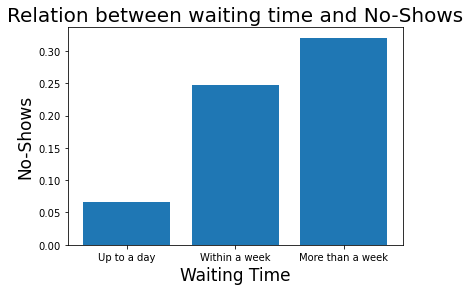

In [48]:
plt.bar(['Up to a day','Within a week','More than a week'],[One_Day_Wait,One_Week_Wait,More_than_One_Week])
plt.title('Relation between waiting time and No-Shows', fontsize=20)
plt.xlabel('Waiting Time', fontsize=17)
plt.ylabel('No-Shows', fontsize=17);

This bar graph clearly shows that the longer the waiting time the higher the possibility of a patient missing their scheduled  appointments.

### 3. SMS Received

In [49]:
df.groupby('SMS_received').No_show.mean()

SMS_received
0    0.167035
1    0.275745
Name: No_show, dtype: float64

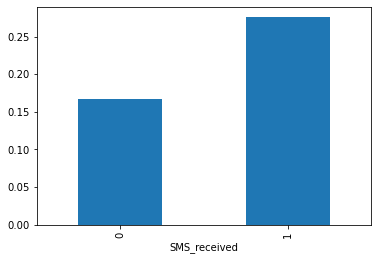

In [50]:
df.groupby('SMS_received').No_show.mean().plot(kind='bar');

Lastly, we examine whether an SMS reminder plays a role in order patients not to miss their scheduled appointments.

With a first look, we notice something strange. The No-Show mean for patients that received an SMS reminder is higher than the ones that did not receive one. This does not make much sense, so we will further investigate. We will try to find out which patients receive an SMS reminder and which don't.

In [51]:
SMS__Received_AwTime1 = AwTime1.query('SMS_received == 1')

SMS__Received_AwTime1_7 = AwTime1_7.query('SMS_received == 1')

SMS__Received_AwTime7Plus = AwTime7Plus.query('SMS_received == 1')

SMS__Received_AwTime1.shape[0], SMS__Received_AwTime1_7.shape[0], SMS__Received_AwTime7Plus.shape[0]


(0, 11548, 23934)

With the help of the masks we created earlier, we filter again our data for scheduled appointments where the patients had been notified by SMS for their appointment. We notice that there is no SMS reminder for appointments that were scheduled within 24 hours and that the later the appointment is scheduled the more frequent the SMS reminders, which is logical and is to be expected in anyway.

In [52]:
AwTime1Plus = df.query('AwaitingTime > 1')

In [53]:
AT1=AwTime1.shape[0]*100/df.shape[0]
ATPlus=AwTime1Plus.shape[0]*100/df.shape[0]
AT1,ATPlus

(39.60606554113964, 60.39393445886036)

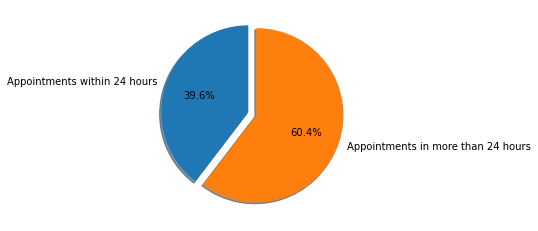

In [54]:
labels = 'Appointments within 24 hours', 'Appointments in more than 24 hours'
sizes = [AT1, ATPlus]

fig1, AT = plt.subplots()
AT.pie(sizes, explode=(0.1,0), labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

plt.show()

Here we try to find out the percentage of appointments that happened within 24 days. We see it is 39.6% which is too high and this is why the No-Shows' mean appeared higher for the patients that received an SMS reminder.

It makes more sense to examine the same thing for the patients that scheduled their appointments for a timeframe greater than 24 hours, but before we will check the percentage of patients who received an SMS reminder

In [55]:
SMS_Received=AwTime1Plus.query('SMS_received == 1')
SMS_Not_Received=AwTime1Plus.query('SMS_received == 0')

In [56]:
SMS_R=SMS_Received.shape[0]*100/AwTime1Plus.shape[0]
SMS_N_R=SMS_Not_Received.shape[0]*100/AwTime1Plus.shape[0]

SMS_R,SMS_N_R

(53.15575796617279, 46.84424203382721)

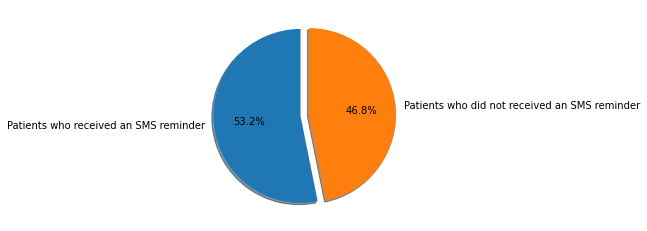

In [57]:
labels = 'Patients who received an SMS reminder', 'Patients who did not received an SMS reminder'
sizes = [SMS_R, SMS_N_R]

fig1, AT = plt.subplots()
AT.pie(sizes, labels=labels, explode=(0.1,0), shadow=True, startangle=90, autopct='%1.1f%%')

plt.show()

Here everything looks normal. It seems like roughly 1 out of 2 patients that scheduled their appointments for a timeframe greater than 24 hours received an SMS reminder

In [58]:
AwTime1Plus.groupby('SMS_received').No_show.mean()

SMS_received
0    0.307973
1    0.275745
Name: No_show, dtype: float64

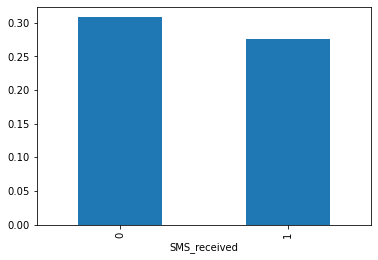

In [59]:
AwTime1Plus.groupby('SMS_received').No_show.mean().plot(kind='bar');

This time the results seem to make more sense. There seems to be a tendency for the patients who received SMS reminders to miss their appointments less frequently.

Since we have the masks for the waiting times, we can investigate further for these waiting times categories and see if the combination of the SMS reminder with a larger waiting time helps patients attend their appointments.

In [60]:
SMS__Received_AwTime1_7 = AwTime1_7.query('SMS_received == 1')
SMS_No_Show_1_7 = SMS__Received_AwTime1_7.No_show.mean()

In [61]:
SMS_Not_Received_AwTime1_7 = AwTime1_7.query('SMS_received == 0')
SMS_No_Show_Not_SMS_Received_1_7=SMS_Not_Received_AwTime1_7.No_show.mean()

In [62]:
SMS__Received_AwTime7Plus = AwTime7Plus.query('SMS_received == 1')
SMS_No_Show_7Plus = SMS__Received_AwTime7Plus.No_show.mean()

In [63]:
SMS_Not_Received_AwTime7Plus = AwTime7Plus.query('SMS_received == 0')
SMS_No_Show_Not_SMS_Received_7Plus=SMS_Not_Received_AwTime7Plus.No_show.mean()

In [64]:
SMS_No_Show_Not_SMS_Received_1_7,SMS_No_Show_1_7

(0.2540670166569447, 0.23761690335988916)

In [65]:
SMS_No_Show_Not_SMS_Received_7Plus,SMS_No_Show_7Plus

(0.36047979797979796, 0.2941422244505724)

We filter our data so that we have four variables to display in one graph:

•	The No-Show mean for patients who scheduled their appointment within a week and received an SMS reminder.

•	The No-Show mean for patients who scheduled their appointment within a week and did not receive an SMS reminder.

•	The No-Show mean for patients who scheduled their appointment in a timeframe greater than a week and received an SMS reminder.

•	The No-Show mean for patients who scheduled their appointment in a timeframe greater than a week and did not received an SMS reminder.


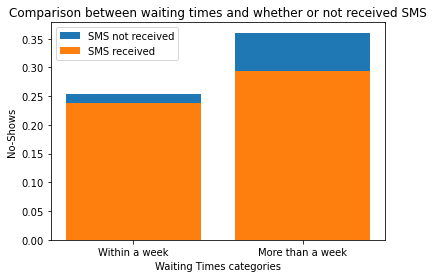

In [66]:
plt.bar(['Within a week','More than a week'],[SMS_No_Show_Not_SMS_Received_1_7,SMS_No_Show_Not_SMS_Received_7Plus],label="SMS not received")
plt.bar(['Within a week','More than a week'],[SMS_No_Show_1_7,SMS_No_Show_7Plus],label="SMS received")
plt.title('Comparison between waiting times and whether or not received SMS')
plt.ylabel('No-Shows')
plt.xlabel('Waiting Times categories')
plt.legend();

Here the tendency is much clearer. As the waiting time increases, patients tend to miss their appointments more frequently but the patients who receive an SMS reminder miss their appointments less frequently.

<a id='conclusions'></a>
# Conclusions

> To summarize this analysis, we can say that in this data set, the patients up to 40 years old missed their medical appointments 4% more than patients in the range of 40-60 years old and 7% more than patients over 60 years old.

>Additionally, patients with known conditions such as Diabetes and Hypertasis and people with Handicaps missed their medical appintments 2-3% less than the patients with no such conditions or any Handicaps. This might be because people with known conditions are more dependent on regular visits to the doctor or regular treatment and thus, they need not to miss their appointments.

>Regarding the Neighbourhoods where the appointments take place, we can say that the top three Neighbourhoods, with more than average number of appointments, in missed appointments are: "ITARARÉ", "JESUS DE NAZARETH" and "ILHA DO PRÍNCIPE" with 6.3%, 4.4% and 3.5% more missed appointments respectively, than the average. On the other hand, the bottom three Neighbourhoods, with more than average number of appointments, in missed appointments are: "SANTA MARTHA", "JARDIM DA PENHA", "CONSOLAÇÃO" with 4.2%, 3.8% and 2.8% less missed appointments respectively, than the average. We can assume that this has to do with the quality of service of the hospitals/practices and/or the degree of danger in each Neighbourhood.

>Another interesting, but rather expected observation is that the longer a patient needed to wait to go to the doctor the more often they missed their appointment. Patients who were scheduled for a doctor visit in less than 24 hours, missed their appointment only 6,6% of the times. On the other hand, patients who were scheduled for a doctor visit within a week missed their appointments 24.7% of the times and the rest who were scheduled for a doctor visit in more than a week missed their appointments 32% of the times. Patients that need to wait many days might forget about their appointment or the condition of their health might improve so they do not need to visit the doctor any more.

>Lastly, regarding the SMS reminders that patients received, we investigated whether the reminders played a role in missing or not their appointments. What we found initially is that, surprisingly the patients who received an SMS reminder missed their appointments 10.8% of the times more than the ones who did not. This, however is not accurate, as the SMS reminders were sent for appointments scheduled for 24+ hours and on. Now, as we found, the appointments scheduled for the first 24 hours was the 39.6% of all the appointments of this data set. this a huge portion of the data set and that's why the first calculation is inaccurate.
We needed to investigate  how much of a role played the received SMS from the second day and on. The findings are that patients who received an SMS reminder missed their appointments 3.2% less than the ones who did not and this number is far more accurate.
Furthermore, we investigated the same thing for waiting times of a week and more than a week. The findings for the first timeframe are that patients who received an SMS reminder missed their appointments 1.7% less than the ones who did not and for the second is that patients who received an SMS reminder missed their appointments 6.6% less than the ones who did not. These numbers show that probably patients that need to wait more for a doctor visit have a higher possibility of forgetting the appointment and thus missing it. An SMS reminder however seems to help more than the it helps patients that need to wait up to a week for a doctor visit.

>To conclude, the more important factors of this dataset seem to be the waiting time for the appointment and the age of the patient.